In [2]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

2024-04-15 03:10:12.763492: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 03:10:12.763586: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 03:10:12.764816: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-15 03:10:12.773424: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
print(tf.__version__)

2.15.0


In [4]:
import zipfile as zf
from pathlib import Path

extract_dir = Path("directory_to_extract")

with zf.ZipFile("pauksciai.zip", 'r') as files:
    # extractina cia
    files.extractall(extract_dir)

# skaiciuoja jpeg ir png fotkes 
jpeg_images = list(extract_dir.glob('**/*.jpg')) + list(extract_dir.glob('**/*.jpeg'))
png_images = list(extract_dir.glob('**/*.png'))

print("JPEG images:", len(jpeg_images))
print("PNG images:", len(png_images))

image_count = len(jpeg_images) + len(png_images)
print("Total images:", image_count)


JPEG images: 99
PNG images: 9
Total images: 108


In [5]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  extract_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 108 files belonging to 4 classes.
Using 87 files for training.


2024-04-15 03:10:16.607164: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-15 03:10:16.638067: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-15 03:10:16.639924: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  extract_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 108 files belonging to 4 classes.
Using 21 files for validation.


In [7]:
class_names = ['crow', 'flamingo', 'pigeon', 'stork']

# trinam birds
#class_names = [class_name for class_name in class_names if class_name != 'birds']
print(class_names)


['crow', 'flamingo', 'pigeon', 'stork']


2024-04-15 03:13:09.873575: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-15 03:13:09.874085: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-04-15 03:13:10.025833: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-04-15 03:13:10.391345: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cach

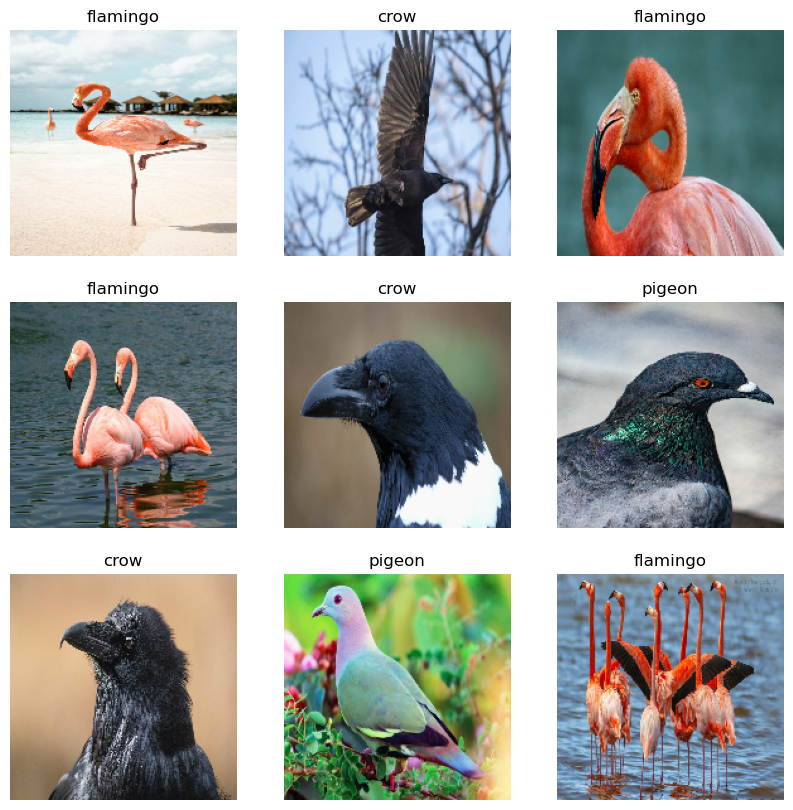

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [19]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


2024-04-15 03:14:03.129850: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-15 03:14:03.129974: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-04-15 03:14:03.283764: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [20]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [21]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


2024-04-15 03:14:07.815106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-15 03:14:07.815177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


In [22]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [23]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

num_classes = 4

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [30]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3


2024-04-15 03:20:53.054050: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at matmul_op_impl.h:813 : INTERNAL: the library was not initialized


InternalError: Graph execution error:

Detected at node sequential_2/dense_4/MatMul defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/opt/conda/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/opt/conda/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/opt/conda/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/opt/conda/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/opt/conda/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/opt/conda/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/opt/conda/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/opt/conda/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/opt/conda/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/opt/conda/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/opt/conda/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 359, in execute_request

  File "/opt/conda/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/opt/conda/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 446, in do_execute

  File "/opt/conda/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/opt/conda/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_107934/2386738274.py", line 1, in <module>

  File "/opt/conda/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/opt/conda/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/opt/conda/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/opt/conda/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/opt/conda/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/opt/conda/lib/python3.11/site-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/opt/conda/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/opt/conda/lib/python3.11/site-packages/keras/src/engine/training.py", line 590, in __call__

  File "/opt/conda/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/opt/conda/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/opt/conda/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/opt/conda/lib/python3.11/site-packages/keras/src/engine/sequential.py", line 398, in call

  File "/opt/conda/lib/python3.11/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/opt/conda/lib/python3.11/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/opt/conda/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/opt/conda/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/opt/conda/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/opt/conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py", line 241, in call

the library was not initialized
	 [[{{node sequential_2/dense_4/MatMul}}]] [Op:__inference_train_function_4056]